In [1]:
from emergency import EmergencyObservationFunction, EmergencySUMOEnvironment, emergency_reward

In [2]:
import os
from trips_generator.config import *
from trips_generator.weibull_trips import main
import subprocess

scene_src_probabilities = {
    "High Traffic Scenerio": [0.25, 0.25, 0.25, 0.25],
    "Low Traffic Scenerio": [0.25, 0.25, 0.25, 0.25],
    "NS-Traffic Scenerio": [0.45, 0.05, 0.45, 0.05],
    "EW-Traffic Scenerio": [0.05, 0.45, 0.05, 0.45],
}

scene_number_cars = {
    "High Traffic Scenerio": 1000,
    "Low Traffic Scenerio": 150,
    "NS-Traffic Scenerio": 500,
    "EW-Traffic Scenerio": 500,
}


if not os.path.exists("routes_test"):
    os.makedirs("routes_test")
    
    for scene in scene_src_probabilities:
        
        main(
            src_nodes,
            dst_nodes,
            scene_src_probabilities[scene],
            turn_prob,
            emergency_prob,
            shape,
            scene_number_cars[scene],
            total_timesteps,
        )
        subprocess.run(
            [
                "duarouter",
                "-n",
                "./network_details/intersection.net.xml",  # Input network file
                "-t",
                "trips.trips.xml",  # Input trips file
                "-o",
                f"routes_test/intersection_{scene}.rou.xml",  # Output routes file
            ]
        )
    os.remove("trips.trips.xml")
        

In [3]:
route_files = [f"routes_test/intersection_{scene}.rou.xml" for scene in scene_src_probabilities]

In [4]:

env = EmergencySUMOEnvironment(
    net_file="network_details/intersection.net.xml",
    route_files=[route_files[0]],
    out_csv_name=f'outputs/Emergency/RoundRobin',
    min_green=25,
    yellow_time=5,
    delta_time=30,
    use_gui=False,
    num_seconds=5400,
    observation_class=EmergencyObservationFunction,
    reward_fn=emergency_reward
)



 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 10ms, vehicles TOT 0 ACT 0 BUF 0)                     


In [5]:
obs, info = env.reset()
done = False

action_index = 0  
while not done:
    action = action_index % 4
    
    next_obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    action_index += 1

obs, info = env.reset()
env.close()

 Retrying in 1 seconds
Step #5400.00 (0ms ?*RT. ?UPS, TraCI: 24ms, vehicles TOT 1000 ACT 1 BUF 0)                tep #4500.00 (0ms ?*RT. ?UPS, TraCI: 14ms, vehicles TOT 996 ACT 1 BUF 0)                 
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 17ms, vehicles TOT 0 ACT 0 BUF 0)                     


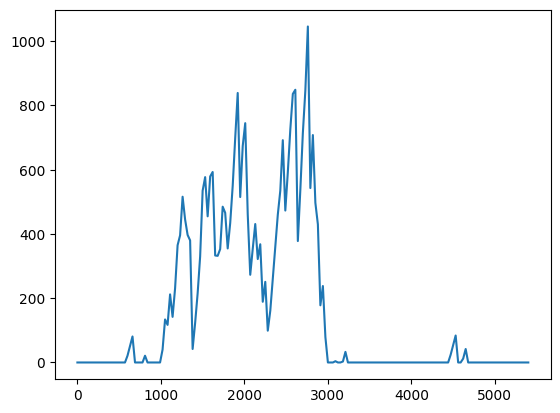

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

rr = pd.read_csv('outputs/Emergency/RoundRobin_conn0_ep1.csv')
plt.plot(rr['step'], rr['emergency_accumulated_waiting_time'])